In [1]:
import pandas as pd

In [2]:
cities = pd.read_csv('DS/cities.csv')
districts = pd.read_csv('DS/districts.csv')
train = pd.read_csv('DS/train.csv')
test = pd.read_csv('DS/test.csv')

In [3]:
cities = cities.rename(columns={'id': 'city_id'})
districts = districts.rename(columns={'id': 'district_id'})

In [4]:
intermediate = pd.merge(train, districts, left_on='district_id', right_on='district_id', how='left')
train = pd.merge(intermediate, cities, left_on='city_id', right_on='city_id', suffixes=['_district', '_city'])

intermediate = pd.merge(test, districts, left_on='district_id', right_on='district_id', how='left')
test = pd.merge(intermediate, cities, left_on='city_id', right_on='city_id', suffixes=['_district', '_city'])

In [69]:
train

,id,created_at_first,category,is_business,district_id,city_id,region_id,description,params,title,price,name_pl_district,lon_district,lat_district,name_pl_city,lon_city,lat_city
0,325017,2018-10-06 12:20:48,Mieszkanie na sprzedaż,1,12867.0,210,14,<p><br/>Oferuję na sprzedaż&nbsp;<strong>miesz...,price[currency]<=>PLN<br>m<=>72.14<br>rooms_nu...,Nowa inwestycja na Dajtkach - mieszkania od 70...,389556,Dajtki,20.42342,53.76516,Olsztyn,20.47703,53.77602
1,376299,2018-07-03 10:20:56,Mieszkanie na sprzedaż,1,280.0,210,14,<p><br/><strong><u>SPRZEDANE!UWAGA NOWA NIZSZA...,price[currency]<=>PLN<br>m<=>49.6<br>rooms_num...,NaN,222000,Kormoran,20.49830,53.76785,Olsztyn,20.47703,53.77602
2,152946,2018-12-05 13:36:08,Mieszkanie na sprzedaż,1,590.0,210,14,<p>Aurora to wyjątkowe ciche i spokojne osiedl...,price[currency]<=>PLN<br>m<=>39.41<br>rooms_nu...,Komfortowe mieszkanie w Olsztynie,254195,Nagórki,20.49327,53.75620,Olsztyn,20.47703,53.77602
3,266877,2018-10-16 18:00:31,Dom na sprzedaż,1,2568.0,210,14,<p><br/>Dom z dużym potencjałem</p><p>Oferta g...,price[currency]<=>PLN<br>terrain_area<=>703<br...,Dom na Redykajnach,690000,Redykajny,20.43742,53.81064,Olsztyn,20.47703,53.77602
4,710096,2018-12-07 12:26:47,Mieszkanie na sprzedaż,1,6168.0,210,14,<p>Mam przyjemność zaprezentować Państwu wyjąt...,price[currency]<=>PLN<br>m<=>36.53<br>rooms_nu...,Kawalerka w pobliżu Michelina na sprzedaż,209000,Osiedle Mazurskie,20.51410,53.76086,Olsztyn,20.47703,53.77602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832006,948671,2018-06-13 15:11:18,Dom na sprzedaż,1,NaN,28204,8,"<p>Jednopiętrowy, wolnostojący dom mieszkalny ...",price[currency]<=>PLN<br>terrain_area<=><br>m<...,NaN,289999,NaN,NaN,NaN,Bodzanowice,18.62771,50.91181
832007,430872,2018-06-25 15:21:29,Dom na sprzedaż,1,NaN,33518,13,<p>OBWIESZCZENIE</p><p>Komornik Sądowy przy Są...,price[currency]<=>PLN<br>terrain_area<=>9234<b...,Zabudowana działka w Nałęczowie,68426,NaN,NaN,NaN,Nałęczów,20.38221,51.23895
832008,143056,2018-06-07 20:28:10,Dom na sprzedaż,1,NaN,449,6,"<p>Sprzedam dom 120m2, działka 29arow, gaz, ka...",price[currency]<=>PLN<br>terrain_area<=>2900<b...,Sprzedam dom z pieknym widokiem w Beskidzie Niski,499000,NaN,NaN,NaN,Sękowa,21.20543,49.61431
832009,475645,2018-09-03 17:45:36,Dom na sprzedaż,1,NaN,41767,3,<p><br/>Atrakcyjny dom jednorodzinny w bardzo ...,price[currency]<=>PLN<br>terrain_area<=>2500<b...,dom jednorodzinny z możliwościami,350000,NaN,NaN,NaN,Zezulin Pierwszy,22.84817,51.35375


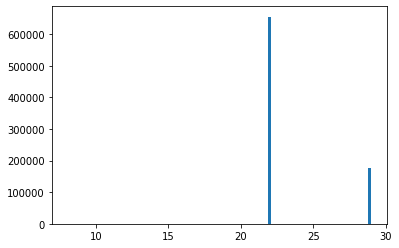

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import random

perm = np.random.permutation(range(len(train)))
plt.hist([len(train.at[perm[i], 'params'].split('<br>')) for i in range(len(train))], bins=100)
plt.show()

In [96]:
train.at[100, 'params'].split('<br>')

['price[currency]<=>PLN',
 'm<=>71.4',
 'rooms_num<=>3',
 'market<=>secondary',
 'building_type<=>tenement',
 'floor_no<=>floor_3',
 'building_floors_num<=>3',
 'building_material<=>brick',
 'windows_type<=>',
 'heating<=>gas',
 'build_year<=>',
 'construction_status<=>',
 'rent<=>price',
 'rent<=>300',
 'rent[currency]<=>PLN',
 'building_ownership<=>',
 'free_from<=>',
 'media_types<=>0',
 'security_types<=>0',
 'equipment_types<=>0',
 'extras_types<=>0',
 '']

In [92]:
len(train)

832011

In [100]:
import tqdm

In [97]:
def parse_params(params):
    result = {}
    params = params.split('<br>')

    for p in params:
        kv = p.split('<=>')
        if len(kv) >= 2:
            key, value = p.split('<=>')
            result[key] = value

    return result

In [101]:
parsed_params = [parse_params(train.at[idx, 'params']) for idx in tqdm.tqdm(range(len(train)))]

100%|██████████| 832011/832011 [00:18<00:00, 45246.07it/s]


In [104]:
params_df = pd.DataFrame(parsed_params)

In [107]:
train = train.join(params_df)

In [108]:
def preprocess_columns(types_columns):
    gather = []
    for column in types_columns:
        result = {}
        for row in column:
            values = row.split('<->')
            if len(values) > 0:
                for v in values:
                    result[v] = 1
        gather.append(result)
    return gather

In [ ]:
preprocess_columns()